# Here we will prove Moore's law in code

# What is Moore's law?

It says that the number of transistors per square inch on integrated circuits doubles approx every two years.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving moore.csv to moore.csv


In [ ]:
# import pandas as pd
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['moore.csv']))
# df2.head()

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
url = "https://raw.githubusercontent.com/ingledarshan/Skillslash_dl/main/moore.csv"
data = pd.read_csv(url, header=None).values
data[:20]

array([[  1971,   2300],
       [  1972,   3500],
       [  1973,   2500],
       [  1973,   2500],
       [  1974,   4100],
       [  1974,   4500],
       [  1974,   8000],
       [  1975,   3510],
       [  1976,   5000],
       [  1976,   8500],
       [  1976,   6500],
       [  1978,   9000],
       [  1978,  29000],
       [  1979,  17500],
       [  1979,  29000],
       [  1979,  68000],
       [  1981,  11500],
       [  1982,  55000],
       [  1982, 134000],
       [  1983,  22000]])

In [4]:
data.shape

(162, 2)

In [5]:
data[:,0]

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20

In [6]:
data[:,0].shape

(162,)

In [7]:
# I want the above shape to be 2D array of size N x D where D=1
X = data[:,0].reshape(-1,1)
X.shape

(162, 1)

In [8]:
Y = data[:,1]
Y.shape # We leave y as a 1D array

(162,)

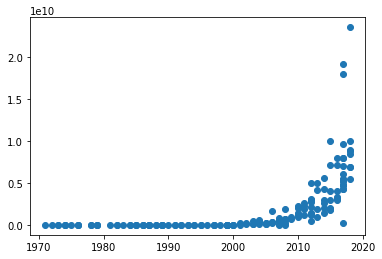

In [9]:
plt.scatter(X,Y)
plt.show()

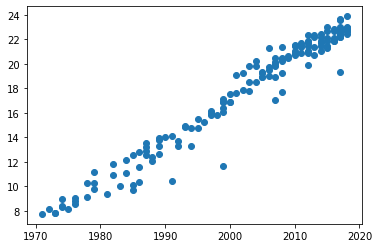

In [10]:
# Since we want a linear model, lets take a log
Y = np.log(Y)
plt.scatter(X,Y)
plt.show()
# thats better

This is a good candidate for Linear Regression.

Lets do a little bit of preprocessing on it. Specifically, we are going to center X.

In [11]:
X = X - X.mean()

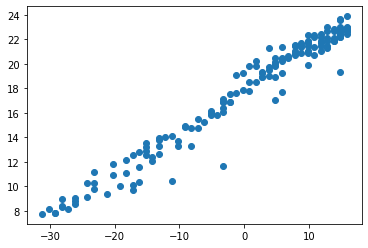

In [12]:
plt.scatter(X,Y)
plt.show()

Unlike Logistic Regression, where we were doing classification, we dont need to map "y to be a number between 0 and 1.

In Linear Regression, the target can be any real number. Hence, we dont use ay Activation function.

Therefore, in Keras, we do use a Dense layer but we pass Activation=None or we can simply omit the argument.

Note: activation=None is the default value.

In [13]:
# Now lets create our Tensorflow model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

Lets call model.compile now.

SGD(learning rate, momentum)

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss="mse")
# model.compile(optimizer="adam", loss="mse")

# Note: We use "mse". In regression, there is no concept of accuracy.

__Another Observation:__

Initial Learning rate performs well at the begining, but becomes too large by the end. Because of this, the cost jumped up and down, but never converged.

So lets decrease the learning rate depending on the epoch number. This is called as __"Learning Rate Scheduling"__.

In [16]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [17]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 541.5208 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 540.9343 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 600.0540 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 277.2521 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 187.2304 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 225.1888 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 211.0014 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 124.3480 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 66.5958 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 44.1179 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss:

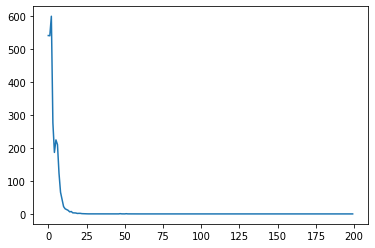

In [18]:
# Plot the loss
plt.plot(r.history["loss"], label="loss")
plt.show()

It looks from the above graph that it has converged.

In [19]:
print(model.layers) 
print(model.layers[0].get_weights())

[array([[0.34107852]], dtype=float32), array([17.769707], dtype=float32)]


In [28]:
# Slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.34107852

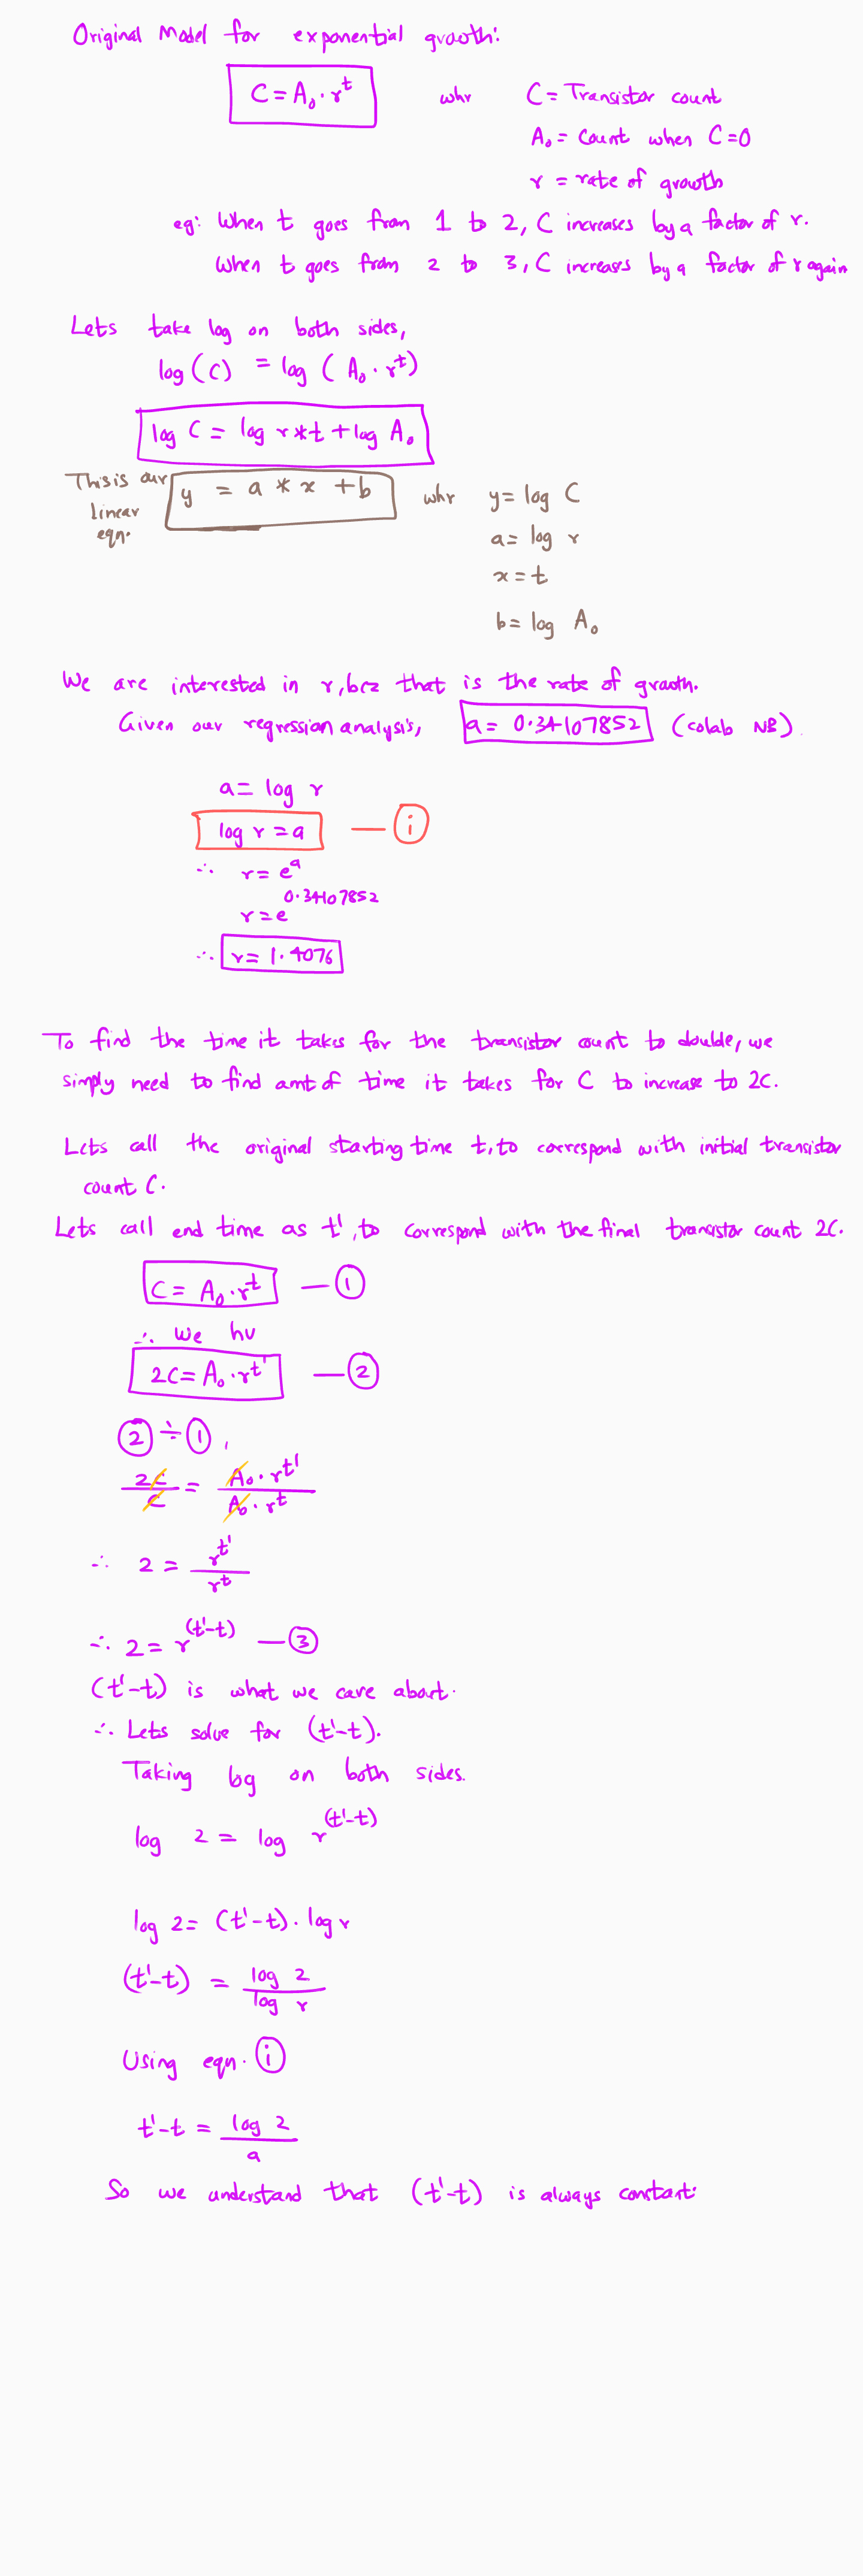

In [22]:
print("Time to double:",np.log(2)/a)

Time to double: 2.0322217327651524


Therefore, we have confirmed that the Moore's law is True as we see it has doubled.

# Making Predictions

In [26]:
Yhat =  model.predict(X).flatten()
Yhat

array([ 7.1288996,  7.4699774,  7.811056 ,  7.811056 ,  8.152135 ,
        8.152135 ,  8.152135 ,  8.493214 ,  8.834291 ,  8.834291 ,
        8.834291 ,  9.516449 ,  9.516449 ,  9.857527 ,  9.857527 ,
        9.857527 , 10.539684 , 10.880763 , 10.880763 , 11.221842 ,
       11.56292  , 11.56292  , 11.903998 , 11.903998 , 11.903998 ,
       12.245077 , 12.245077 , 12.245077 , 12.586155 , 12.586155 ,
       12.586155 , 12.586155 , 12.927235 , 12.927235 , 13.268312 ,
       13.268312 , 13.268312 , 13.268312 , 13.609391 , 13.95047  ,
       13.95047  , 14.291548 , 14.291548 , 14.632627 , 14.632627 ,
       14.973705 , 14.973705 , 15.314783 , 16.679098 , 15.314783 ,
       15.655862 , 15.996941 , 15.996941 , 15.996941 , 16.338018 ,
       16.679098 , 16.679098 , 17.020176 , 17.020176 , 16.679098 ,
       16.679098 , 16.679098 , 17.020176 , 17.361254 , 17.361254 ,
       17.702333 , 18.384491 , 18.384491 , 18.725569 , 19.066647 ,
       18.725569 , 19.066647 , 19.407726 , 19.748804 , 18.0434

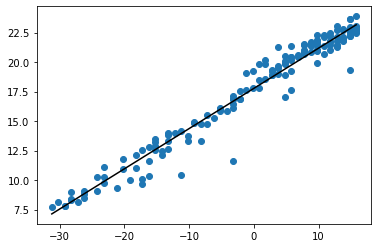

In [30]:
# Make sure that the line fits our data
plt.scatter(X, Y)
plt.plot(X, Yhat, color="black") # line
plt.show()

# Observation:

As expected, the line passes through our data points. Therefore, here we have again confirmed that the Moore's law is True.